<a href="https://colab.research.google.com/github/bskarthik05/Task_5/blob/main/Task_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install graphviz

In [2]:
!apt-get update

Hit:1 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:4 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:7 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Hit:10 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Fetched 128 kB in 2s (82.2 kB/s)
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)


In [3]:
!apt-get install -y graphviz

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.


In [4]:
import subprocess
import sys
import os

In [5]:
def install_packages():
    print("--- Attempting to install graphviz ---")
    try:
        subprocess.check_call([sys.executable, "-m", "pip", "install", "graphviz"])
        print("Successfully installed 'graphviz' Python package.")
        try:
            print("Attempting to install system-level Graphviz...")
            apt_get_check = subprocess.run(["which", "apt-get"], capture_output=True, text=True)
            if apt_get_check.returncode == 0:
                subprocess.check_call(["apt-get", "update"])
                subprocess.check_call(["apt-get", "install", "-y", "graphviz"])
                print("Successfully installed system-level Graphviz using apt-get.")
            else:
                print("'apt-get' not found. Skipping system-level Graphviz installation.")
        except subprocess.CalledProcessError as e:
            print(f"Failed to install system-level Graphviz using apt-get: {e}")
        except FileNotFoundError:
            print("'apt-get' not found. Skipping system-level Graphviz installation.")
    except subprocess.CalledProcessError as e:
        print(f"Error installing the 'graphviz' Python package: {e}")
    print("--- Graphviz installation attempt finished ---")


In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import numpy as np

In [7]:
try:
    import graphviz
    GRAPHVIZ_AVAILABLE = True
    print("Successfully imported 'graphviz' module.")
except ImportError:
    GRAPHVIZ_AVAILABLE = False
    print("Failed to import 'graphviz' module. Tree visualization will be skipped.")

Successfully imported 'graphviz' module.


In [33]:
print("1. Data Loading and Initial Inspection")
file_path = "/content/sample_data/heart.csv"
if not os.path.exists(file_path):
    print(f"Error: The file '{file_path}' was not found. Please upload it to your Colab session storage.")
    sys.exit(f"Terminating script: {file_path} not found.")

1. Data Loading and Initial Inspection


In [34]:
df_heart = pd.read_csv(file_path)

In [35]:
print("--- First 5 rows of the dataset ---")
print(df_heart.head())

--- First 5 rows of the dataset ---
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  


In [36]:
print("--- Dataset Information ---")
df_heart.info()

--- Dataset Information ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [37]:
print("--- Basic Statistics ---")
print(df_heart.describe())

--- Basic Statistics ---
               age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.434146     0.695610     0.942439   131.611707   246.00000   
std       9.072290     0.460373     1.029641    17.516718    51.59251   
min      29.000000     0.000000     0.000000    94.000000   126.00000   
25%      48.000000     0.000000     0.000000   120.000000   211.00000   
50%      56.000000     1.000000     1.000000   130.000000   240.00000   
75%      61.000000     1.000000     2.000000   140.000000   275.00000   
max      77.000000     1.000000     3.000000   200.000000   564.00000   

               fbs      restecg      thalach        exang      oldpeak  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.000000   
mean      0.149268     0.529756   149.114146     0.336585     1.071512   
std       0.356527     0.527878    23.005724     0.472772     1.175053   
min       0.000000   

In [38]:
print("--- Missing Values ---")
print(df_heart.isnull().sum())

--- Missing Values ---
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [39]:
if df_heart.isnull().sum().sum() > 0:
    print("Warning: Missing values detected.")
else:
    print("No missing values found in the dataset.")
print("-" * 60)

No missing values found in the dataset.
------------------------------------------------------------


In [40]:
print("2. Data Preparation")
if 'target' not in df_heart.columns:
    print("Error: 'target' column not found in the CSV. Please check your dataset.")
    sys.exit("Terminating script: Target column 'target' is missing.")

X = df_heart.drop('target', axis=1)
y = df_heart['target']

2. Data Preparation


In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"X_train shape: {X_train.shape}, X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}, y_test shape: {y_test.shape}")
print(f"Class distribution in y_train:\n{y_train.value_counts(normalize=True)}")
print(f"Class distribution in y_test:\n{y_test.value_counts(normalize=True)}")
print("-" * 60)

X_train shape: (820, 13), X_test shape: (205, 13)
y_train shape: (820,), y_test shape: (205,)
Class distribution in y_train:
target
1    0.513415
0    0.486585
Name: proportion, dtype: float64
Class distribution in y_test:
target
1    0.512195
0    0.487805
Name: proportion, dtype: float64
------------------------------------------------------------


In [42]:
print("3. Decision Tree Classifier and Visualization")
dt_classifier_viz = DecisionTreeClassifier(random_state=42, max_depth=3)
dt_classifier_viz.fit(X_train, y_train)

3. Decision Tree Classifier and Visualization


DecisionTreeClassifier(max_depth=3, random_state=42)

In [43]:
if GRAPHVIZ_AVAILABLE:
    try:
        class_names_display = sorted([str(c) for c in y.unique()])
        if len(class_names_display) == 2 and '0' in class_names_display and '1' in class_names_display:
             class_names_display = ['No Disease (0)', 'Disease (1)']

        dot_data = export_graphviz(dt_classifier_viz, out_file=None,
                                   feature_names=X.columns,
                                   class_names=class_names_display,
                                   filled=True, rounded=True,
                                   special_characters=True,
                                   max_depth=3)
        graph = graphviz.Source(dot_data)
        # In Colab, to display the graph directly:
        # display(graph)
        # To save:
        graph.render("decision_tree_heart_viz", format="png", cleanup=True)
        print("Decision tree (max_depth=3) visualization saved as 'decision_tree_heart_viz.png'")
    except Exception as e:
        print(f"Could not visualize the decision tree using Graphviz. Error: {e}")
else:
    print("Skipping decision tree visualization as Graphviz is not available or failed to import.")


Decision tree (max_depth=3) visualization saved as 'decision_tree_heart_viz.png'


In [44]:
y_pred_dt_viz = dt_classifier_viz.predict(X_test)
accuracy_dt_viz = accuracy_score(y_test, y_pred_dt_viz)
print(f"Accuracy of Decision Tree (max_depth=3) on test set: {accuracy_dt_viz:.4f}")
print("Classification Report for Decision Tree (max_depth=3):")
print(classification_report(y_test, y_pred_dt_viz, zero_division=0))
print("-" * 60)

Accuracy of Decision Tree (max_depth=3) on test set: 0.8537
Classification Report for Decision Tree (max_depth=3):
              precision    recall  f1-score   support

           0       0.87      0.82      0.85       100
           1       0.84      0.89      0.86       105

    accuracy                           0.85       205
   macro avg       0.86      0.85      0.85       205
weighted avg       0.85      0.85      0.85       205

------------------------------------------------------------


In [45]:
print("4. Analyzing Overfitting by Controlling Tree Depth")
train_accuracies = []
test_accuracies = []
max_possible_depth = min(20, X_train.shape[1] if X_train.shape[1] > 0 else 20)
depths = range(1, max_possible_depth + 1)

4. Analyzing Overfitting by Controlling Tree Depth


In [46]:
for depth_val in depths:
    dt_model = DecisionTreeClassifier(max_depth=depth_val, random_state=42)
    dt_model.fit(X_train, y_train)
    train_accuracies.append(accuracy_score(y_train, dt_model.predict(X_train)))
    test_accuracies.append(accuracy_score(y_test, dt_model.predict(X_test)))


Plot of Decision Tree accuracy vs. depth saved as 'dt_accuracy_vs_depth.png'


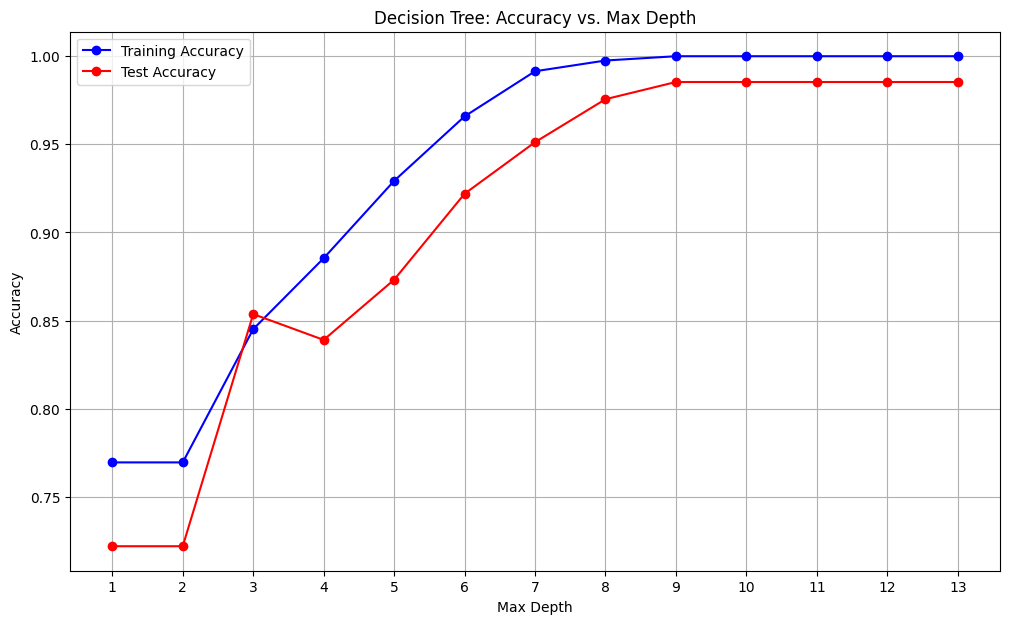

In [47]:
plt.figure(figsize=(12, 7))
plt.plot(depths, train_accuracies, 'bo-', label='Training Accuracy')
plt.plot(depths, test_accuracies, 'ro-', label='Test Accuracy')
plt.title('Decision Tree: Accuracy vs. Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.xticks(depths)
plt.legend()
plt.grid(True)
plt.savefig("dt_accuracy_vs_depth.png")
print("Plot of Decision Tree accuracy vs. depth saved as 'dt_accuracy_vs_depth.png'")


In [48]:
best_depth_idx = np.argmax(test_accuracies)
best_depth_dt = depths[best_depth_idx]
print(f"Best test accuracy ({test_accuracies[best_depth_idx]:.4f}) found at max_depth = {best_depth_dt} for Decision Tree.")


Best test accuracy (0.9854) found at max_depth = 9 for Decision Tree.


In [49]:
dt_classifier_optimized = DecisionTreeClassifier(max_depth=best_depth_dt, random_state=42)
dt_classifier_optimized.fit(X_train, y_train)
y_pred_dt_optimized = dt_classifier_optimized.predict(X_test)
accuracy_dt_optimized = accuracy_score(y_test, y_pred_dt_optimized)
print(f"Optimized Decision Tree (max_depth={best_depth_dt}) Test Accuracy: {accuracy_dt_optimized:.4f}")
print("Classification Report for Optimized Decision Tree:")
print(classification_report(y_test, y_pred_dt_optimized, zero_division=0))
print("-" * 60)


Optimized Decision Tree (max_depth=9) Test Accuracy: 0.9854
Classification Report for Optimized Decision Tree:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       100
           1       1.00      0.97      0.99       105

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205

------------------------------------------------------------


In [50]:
print("5. Random Forest Classifier")
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1,
                                     max_depth=best_depth_dt,
                                     min_samples_split=2, min_samples_leaf=1)
rf_classifier.fit(X_train, y_train)
y_pred_rf = rf_classifier.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

5. Random Forest Classifier


In [51]:
print(f"Random Forest (n_estimators=100, max_depth={best_depth_dt}) Test Accuracy: {accuracy_rf:.4f}")
print("Classification Report for Random Forest:")
print(classification_report(y_test, y_pred_rf, zero_division=0))


Random Forest (n_estimators=100, max_depth=9) Test Accuracy: 1.0000
Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00       105

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205



In [52]:
print(f"--- Accuracy Comparison ---")
print(f"  Optimized Decision Tree (max_depth={best_depth_dt}) Test Accuracy: {accuracy_dt_optimized:.4f}")
print(f"  Random Forest (n_estimators=100, max_depth={best_depth_dt}) Test Accuracy: {accuracy_rf:.4f}")
print("-" * 60)

--- Accuracy Comparison ---
  Optimized Decision Tree (max_depth=9) Test Accuracy: 0.9854
  Random Forest (n_estimators=100, max_depth=9) Test Accuracy: 1.0000
------------------------------------------------------------


In [53]:
print("6. Feature Importances from Random Forest")
importances = rf_classifier.feature_importances_
feature_names = X.columns
forest_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)


6. Feature Importances from Random Forest


Plot of Random Forest feature importances saved as 'rf_feature_importances.png'


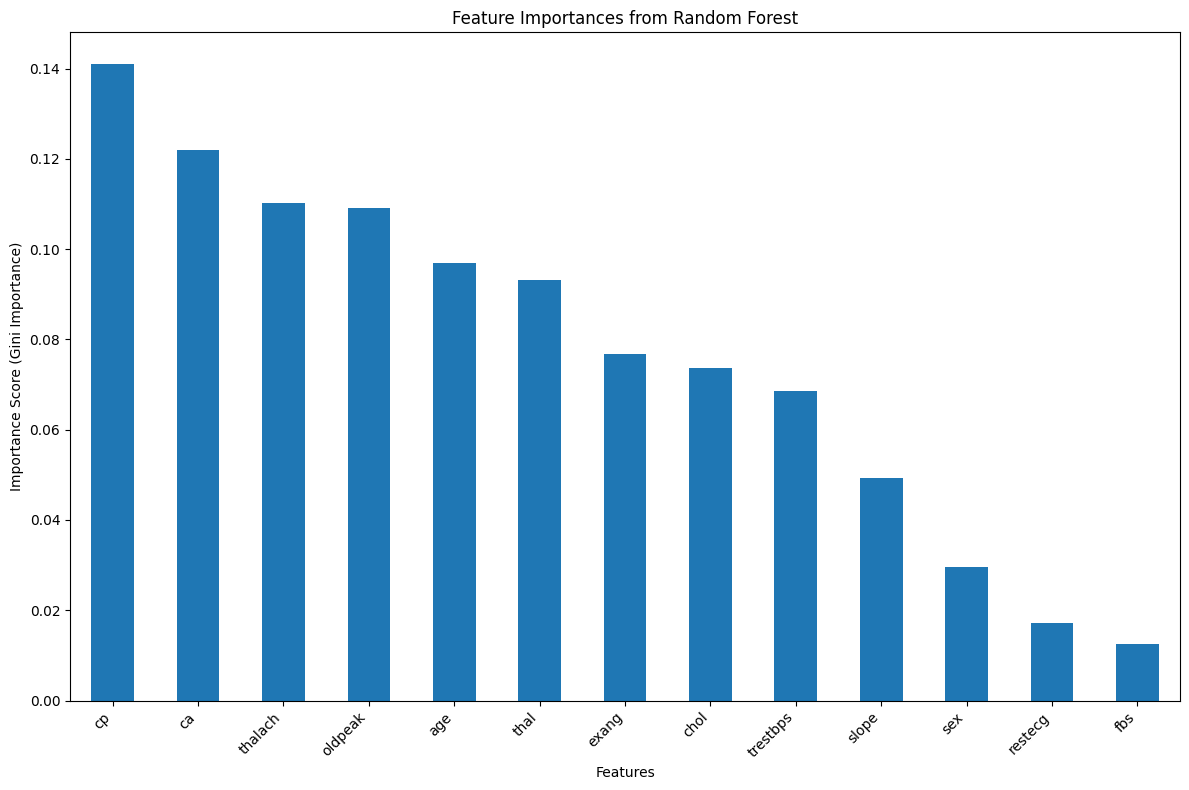

In [54]:
plt.figure(figsize=(12, 8))
forest_importances.plot(kind='bar')
plt.title('Feature Importances from Random Forest')
plt.ylabel('Importance Score (Gini Importance)')
plt.xlabel('Features')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.savefig("rf_feature_importances.png")
print("Plot of Random Forest feature importances saved as 'rf_feature_importances.png'")


In [55]:
print("Top features and their importances:")
print(forest_importances)
print("-" * 60)

Top features and their importances:
cp          0.141004
ca          0.121878
thalach     0.110335
oldpeak     0.109130
age         0.096908
thal        0.093141
exang       0.076829
chol        0.073701
trestbps    0.068647
slope       0.049283
sex         0.029502
restecg     0.017167
fbs         0.012476
dtype: float64
------------------------------------------------------------


In [56]:
print("7. Cross-Validation (5-fold)")
cv_scores_dt = cross_val_score(dt_classifier_optimized, X, y, cv=5, scoring='accuracy')
print(f"\nOptimized Decision Tree (max_depth={best_depth_dt}) Cross-Validation Scores: {cv_scores_dt}")
print(f"  Mean CV Accuracy: {cv_scores_dt.mean():.4f}")
print(f"  Standard Deviation of CV Accuracy: {cv_scores_dt.std():.4f}")

7. Cross-Validation (5-fold)

Optimized Decision Tree (max_depth=9) Cross-Validation Scores: [1.        1.        1.        0.9902439 1.       ]
  Mean CV Accuracy: 0.9980
  Standard Deviation of CV Accuracy: 0.0039


In [57]:
rf_for_cv = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1,
                                   max_depth=best_depth_dt,
                                   min_samples_split=2, min_samples_leaf=1)
cv_scores_rf = cross_val_score(rf_for_cv, X, y, cv=5, scoring='accuracy')
print(f"Random Forest (n_estimators=100, max_depth={best_depth_dt}) Cross-Validation Scores: {cv_scores_rf}")
print(f"  Mean CV Accuracy: {cv_scores_rf.mean():.4f}")
print(f"  Standard Deviation of CV Accuracy: {cv_scores_rf.std():.4f}")
print("-" * 60)

Random Forest (n_estimators=100, max_depth=9) Cross-Validation Scores: [1.         1.         0.98536585 1.         0.98536585]
  Mean CV Accuracy: 0.9941
  Standard Deviation of CV Accuracy: 0.0072
------------------------------------------------------------
